<a href="https://colab.research.google.com/github/Mkab785/Projet_ML_LOUIS_MACCHI_KABIR/blob/main/ProjectMachineLearningA4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project - **Engine data**
### Machine Learning - MMN 4
#### *MACCHI Nicola, KABIR Mohamed, LOUIS Viny-Paul*

### About Dataset

The dataset could include various features and measurements related to the engine health of vehicles, such as engine RPM, temperature, pressure, and other sensor data. It may also include metadata on the vehicle, such as make, model, year, and mileage.

### Why

This dataset could be used to develop a predictive maintenance model for automotive engines. By analyzing trends, artificial intelligence could anticipate repair needs, helping owners and mechanics to intervene before a breakdown occurs. This would improve the performance and longevity of engines.

Another possible application would be the comparative analysis of the performance of different engines and vehicles. This would allow researchers to evaluate the most effective manufacturers or maintenance strategies that foster innovation in the automotive sector.

In [4]:
url_csv = "https://raw.githubusercontent.com/Mkab785/Projet_ML_LOUIS_MACCHI_KABIR/refs/heads/main/engine_data.csv" # Raw data URL on our GitHub repository
import pandas as pd
df = pd.read_csv(url_csv )

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import joblib

sns.set(style="whitegrid") # Set the aesthetic style of the plots

In [6]:
print("File:", url_csv)
print("Shape:", df.shape) # Print the shape of the DataFrame (rows, columns)
display(df.head(10)) # Display the first 10 rows of the DataFrame

File: https://raw.githubusercontent.com/Mkab785/Projet_ML_LOUIS_MACCHI_KABIR/refs/heads/main/engine_data.csv
Shape: (19535, 7)


,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0
5,1221,3.989226,6.679231,2.214250,76.401152,75.669818,0
6,716,3.568896,5.312266,2.461067,83.646589,79.792411,1
7,729,3.845166,10.191126,2.362998,77.921202,71.671761,1
8,845,4.877239,3.638269,3.525604,76.301626,70.496024,0
9,824,3.741228,7.626214,1.301032,77.066520,85.143297,0


In [7]:
target_col = "Engine Condition" # Define the target column for prediction
if target_col not in df.columns:
    raise KeyError(f"Target column '{target_col}' not found. Columns: {list(df.columns)}")
if not pd.api.types.is_categorical_dtype(df[target_col]): # Ensure target column is categorical
    df[target_col] = df[target_col].astype('category')

num_cols = [c for c in df.select_dtypes(include=[np.number]).columns.tolist() if c != target_col] # Identify numerical feature columns
print("Numeric feature columns:", num_cols)

Numeric feature columns: ['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure', 'lub oil temp', 'Coolant temp']


/tmp/ipython-input-3928756775.py:4: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(df[target_col]): # Ensure target column is categorical


In [ ]:
print("\n--- Dtypes & Non-null counts ---")
display(df.info()) # Display information about the DataFrame, including data types and non-null counts


--- Dtypes & Non-null counts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Engine rpm        19535 non-null  int64   
 1   Lub oil pressure  19535 non-null  float64 
 2   Fuel pressure     19535 non-null  float64 
 3   Coolant pressure  19535 non-null  float64 
 4   lub oil temp      19535 non-null  float64 
 5   Coolant temp      19535 non-null  float64 
 6   Engine Condition  19535 non-null  category
dtypes: category(1), float64(5), int64(1)
memory usage: 935.0 KB


None

In [ ]:
print("\n--- Numeric summary (describe) ---")
display(df[num_cols].describe().T) # Display descriptive statistics for numerical columns


--- Numeric summary (describe) ---


,count,mean,std,min,25%,50%,75%,max
Engine rpm,19535.0,791.239263,267.611193,61.000000,593.000000,746.000000,934.000000,2239.000000
Lub oil pressure,19535.0,3.303775,1.021643,0.003384,2.518815,3.162035,4.055272,7.265566
Fuel pressure,19535.0,6.655615,2.761021,0.003187,4.916886,6.201720,7.744973,21.138326
Coolant pressure,19535.0,2.335369,1.036382,0.002483,1.600466,2.166883,2.848840,7.478505
lub oil temp,19535.0,77.643420,3.110984,71.321974,75.725990,76.817350,78.071691,89.580796
Coolant temp,19535.0,78.427433,6.206749,61.673325,73.895421,78.346662,82.915411,195.527912


In [ ]:
print("\n--- Missing values per column ---")
missing = df.isnull().sum() # Calculate the number of missing values per column
display(missing)


--- Missing values per column ---


,0
Engine rpm,0
Lub oil pressure,0
Fuel pressure,0
Coolant pressure,0
lub oil temp,0
Coolant temp,0
Engine Condition,0


In [ ]:
print("\n--- Target 'Engine Condition' value counts ---")
display(df[target_col].value_counts()) # Display the counts of each unique value in the target column
display(df[target_col].value_counts(normalize=True).round(3)) # Display normalized counts of each unique value in the target column


--- Target 'Engine Condition' value counts ---


,count
Engine Condition,
1,12317
0,7218


,proportion
Engine Condition,
1,0.631
0,0.369


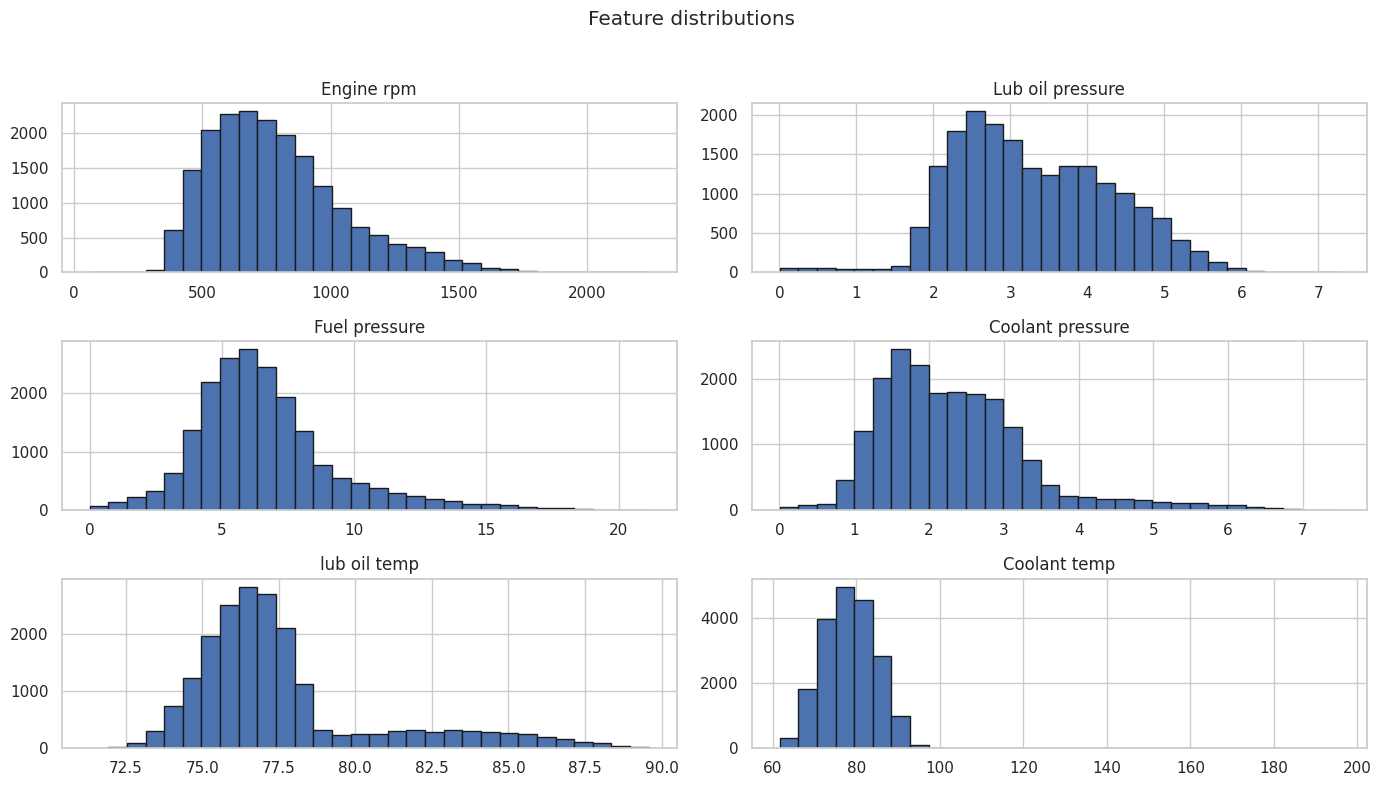

In [ ]:
if len(num_cols) > 0:
    df[num_cols].hist(bins=30, figsize=(14, 8), edgecolor='k') # Plot histograms for numerical features
    plt.suptitle("Feature distributions") # Set the main title for the plots
    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust layout to prevent overlap
    plt.show()
else:
    print("No numeric feature columns found to plot histograms.")

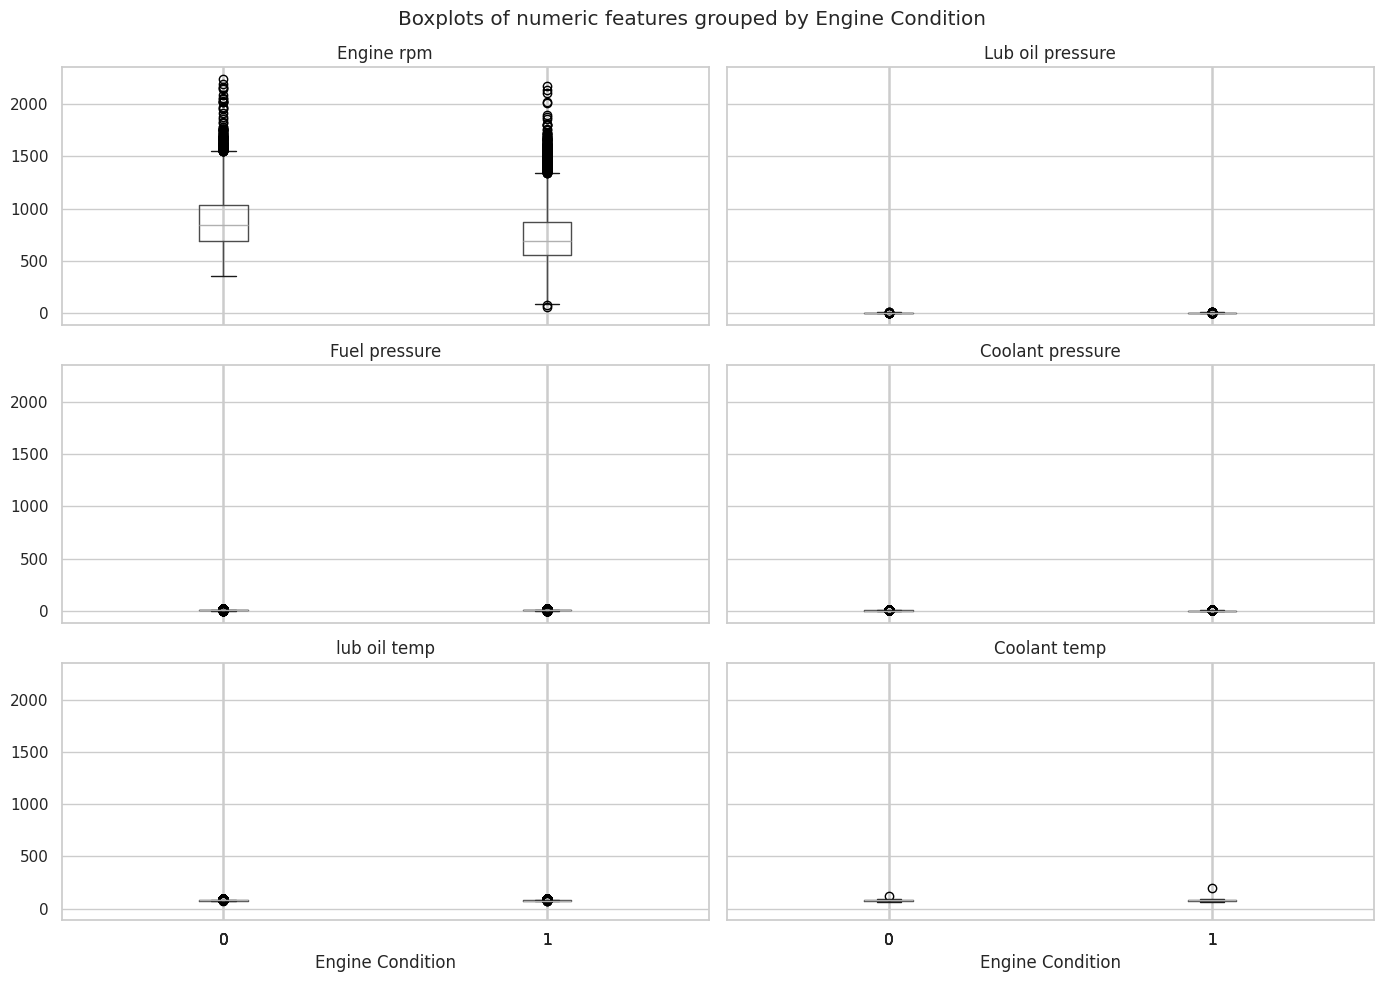

In [ ]:
if len(num_cols) > 0:
    # pandas boxplot grouped by target — pandas decides layout automatically
    _ = df.boxplot(column=num_cols, by=target_col, figsize=(14, 10)) # Create box plots for numerical features, grouped by target
    plt.suptitle("")   # Remove the automatic 'by' title pandas adds
    plt.suptitle("Boxplots of numeric features grouped by Engine Condition") # Set the main title for the plots
    plt.tight_layout() # Adjust layout to prevent overlap
    plt.show() # Display the plots
else:
    print("No numeric feature columns found to plot boxplots.")

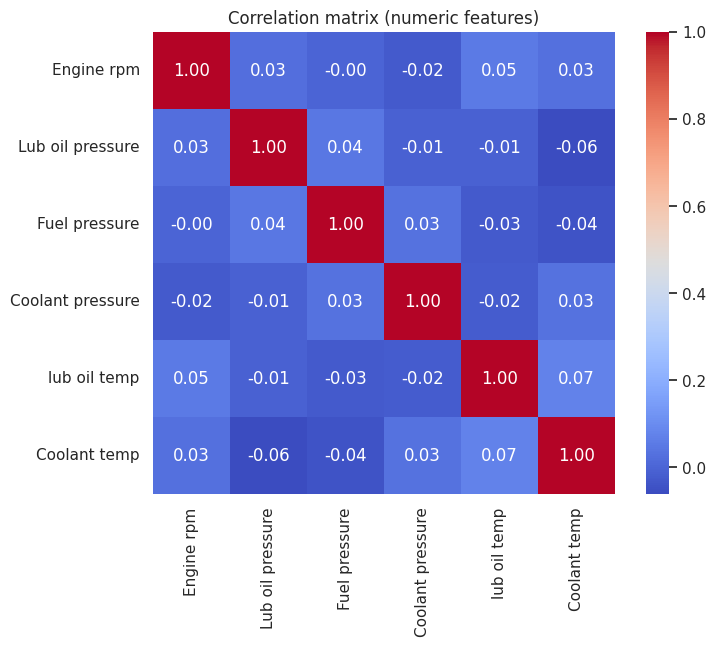

In [ ]:
if len(num_cols) >= 2:
    corr = df[num_cols].corr() # Calculate the correlation matrix for numerical features
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True) # Plot the correlation matrix as a heatmap
    plt.title("Correlation matrix (numeric features)") # Set the title of the plot
    plt.show() # Display the plot
else:
    print("Not enough numeric features for correlation matrix.")

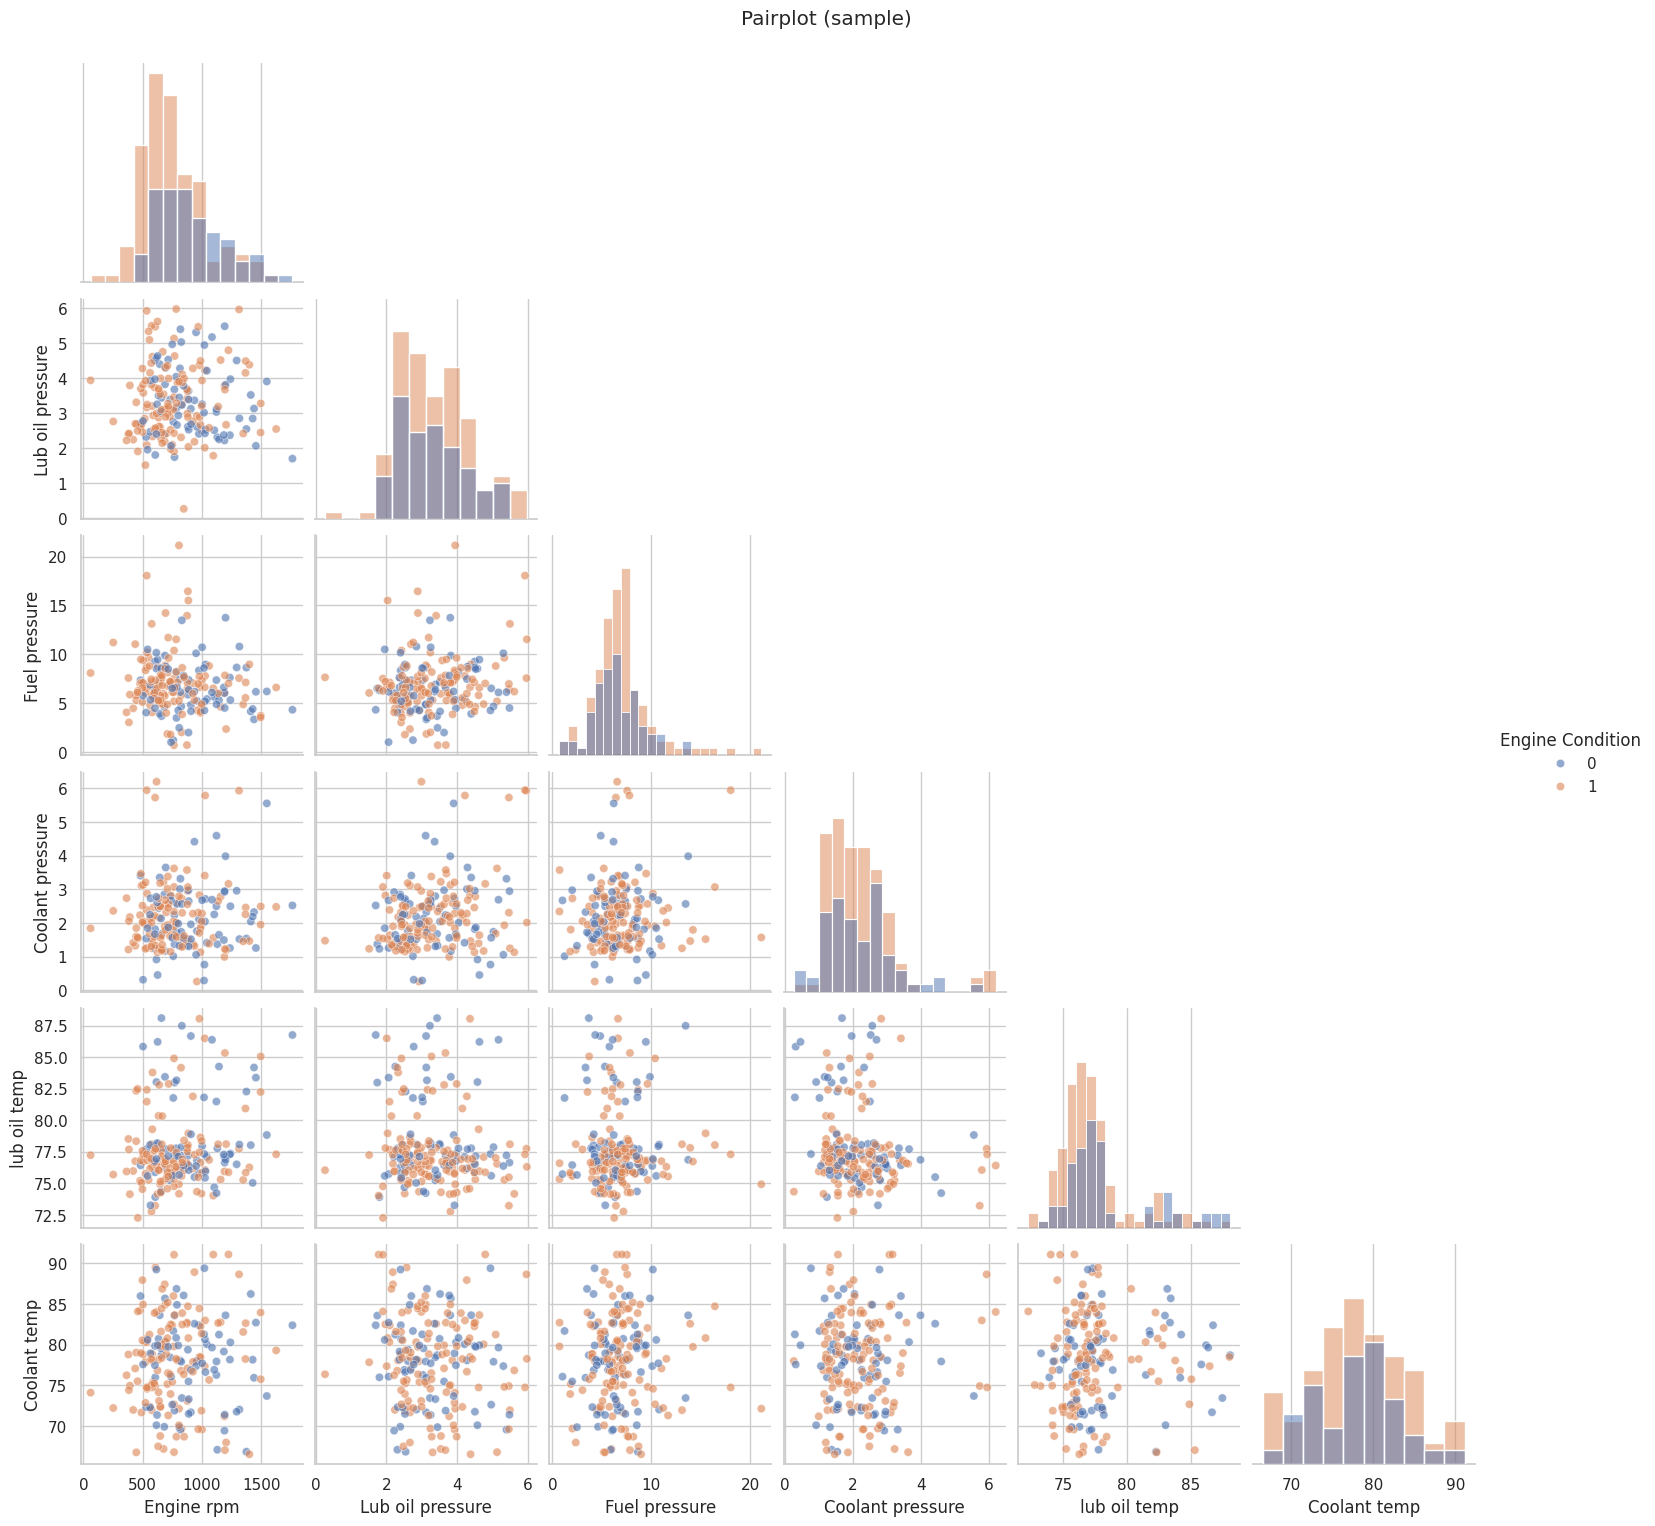

In [ ]:
sample_size = 200
if len(df) > sample_size:
    sample = df.sample(n=sample_size, random_state=42) # Take a random sample if the DataFrame is large
else:
    sample = df
# limit pairplot to numeric columns + target for hue
pairplot_cols = num_cols.copy()
if len(pairplot_cols) > 0:
    try:
        sns.pairplot(sample, vars=pairplot_cols, hue=target_col, diag_kind='hist', corner=True, plot_kws={'alpha':0.6}) # Create a pairplot for selected features, colored by target
        plt.suptitle("Pairplot (sample)", y=1.02) # Set the main title for the plot
        plt.show() # Display the plot
    except Exception as e:
        print("Pairplot failed (likely too many features / heavy). Error:", e)
else:
    print("No numeric features for pairplot.")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Data cleaning
df = df.dropna() # Remove rows with any missing values
df = df.drop_duplicates() # Remove duplicate rows

# Define features and target
X = df.drop('Engine Condition', axis=1) # Features (all columns except the target)
y = df['Engine Condition'] # Target variable

# Feature scaling
scaler = StandardScaler() # Initialize StandardScaler for feature scaling
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns) # Scale features to have zero mean and unit variance

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y # Split data into training and testing sets
)

# Verification section
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)
print("Shape after scaling:", X_scaled.shape)
print("\n Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("\nMean of scaled features (should be close to 0):")
print(X_scaled.mean().round(3))
print("\nStd of scaled features (should be close to 1):")
print(X_scaled.std().round(3))
print("\nDistribution of Engine Condition:")
print(y.value_counts(normalize=True).round(3))
print("\nPreprocessing complete and data ready for modeling!")

Shape of X (features): (19535, 6)
Shape of y (target): (19535,)
Shape after scaling: (19535, 6)

 Training set shape: (15628, 6)
Test set shape: (3907, 6)

Mean of scaled features (should be close to 0):
Engine rpm         -0.0
Lub oil pressure   -0.0
Fuel pressure       0.0
Coolant pressure   -0.0
lub oil temp        0.0
Coolant temp       -0.0
dtype: float64

Std of scaled features (should be close to 1):
Engine rpm          1.0
Lub oil pressure    1.0
Fuel pressure       1.0
Coolant pressure    1.0
lub oil temp        1.0
Coolant temp        1.0
dtype: float64

Distribution of Engine Condition:
Engine Condition
1    0.631
0    0.369
Name: proportion, dtype: float64

Preprocessing complete and data ready for modeling!


For step 3 : our problem is to predict if the engine is in good or bad condition. 0 means that the engine is in a bad state and 1 means the engine is in a good state.


In [ ]:
#Test section

from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error

# Initialize models
models = {
    "SVM": SVC(kernel='rbf', random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "LinearRegression": LinearRegression(),  # Regression version (for comparison, even if target is classification)
    "DecisionTree": DecisionTreeClassifier(random_state=42)
}

# Check if target is numeric or categorical to determine classification or regression task
is_classification = y_train.dtype.name == 'category' or y_train.nunique() < 10

results = {}

for name, model in models.items():
    print(f"\n{'='*40}\nTraining {name}...\n{'='*40}")
    model.fit(X_train, y_train) # Train the model on the training data

    # Predict
    y_pred = model.predict(X_test) # Make predictions on the test data

    if is_classification and name != "LinearRegression": # Evaluate classification models
        acc = accuracy_score(y_test, y_pred) # Calculate accuracy
        print(f" Accuracy ({name}): {acc:.3f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred)) # Print classification report (precision, recall, f1-score)
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred)) # Print confusion matrix
        results[name] = acc
    else:
        # For LinearRegression or regression-type data
        mse = mean_squared_error(y_test.astype(float), y_pred.astype(float)) # Calculate Mean Squared Error for regression
        print(f" MSE ({name}): {mse:.3f}")
        results[name] = mse

#Summary
print("\n=== Model Comparison ===")
for name, score in results.items():
    metric = "Accuracy" if is_classification and name != "LinearRegression" else "MSE"
    print(f"{name:20s} : {metric} = {score:.3f}")


Training SVM...
 Accuracy (SVM): 0.664

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.27      0.37      1444
           1       0.68      0.90      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.64      0.58      0.57      3907
weighted avg       0.65      0.66      0.62      3907


Confusion Matrix:
[[ 389 1055]
 [ 257 2206]]

Training RandomForest...
 Accuracy (RandomForest): 0.649

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.39      0.45      1444
           1       0.69      0.80      0.74      2463

    accuracy                           0.65      3907
   macro avg       0.61      0.60      0.60      3907
weighted avg       0.63      0.65      0.63      3907


Confusion Matrix:
[[ 564  880]
 [ 493 1970]]

Training KNN...
 Accuracy (KNN): 0.627

Classification Report:
              precision    recall  f1-score 

LAB6

In [ ]:
import os
import time
import timeit
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV # For hyperparameter tuning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier # Ensemble methods
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix # Evaluation metrics
from sklearn.base import clone # To create copies of estimators
from sklearn.decomposition import PCA # For dimensionality reduction

In [9]:
sns.set(style="whitegrid") # Set seaborn plot style

SAVE_DIR = os.path.dirname(url_csv) or "." # Define directory to save artifacts
os.makedirs(SAVE_DIR, exist_ok=True) # Create the directory if it doesn't exist

RANDOM_STATE = 42 # Seed for reproducibility
CV = 2 # Number of cross-validation folds, we set it to 5 but it was taking 45min, so by using 2 it takes now around 8min
N_JOBS = -1 # Use all available CPU cores


In [ ]:
if hasattr(y_train, "nunique"):
    n_classes = int(y_train.nunique())
else:
    n_classes = len(np.unique(y_train))
is_binary = (n_classes == 2) # Check if it's a binary classification problem
scoring = 'f1' if is_binary else 'f1_macro' # Set scoring metric for GridSearchCV
print(f"Detected {n_classes} classes. Using scoring = '{scoring}' for GridSearchCV/evaluation.")

if pd.api.types.is_categorical_dtype(y_train):
    label_classes = list(y_train.cat.categories)
else:
    label_classes = list(pd.Series(y_train).unique()) # Get unique class labels

Detected 2 classes. Using scoring = 'f1' for GridSearchCV/evaluation.


/tmp/ipython-input-2456546935.py:9: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(y_train):


In [ ]:
estimators_and_grids = {
    "SVC": {
        "est": SVC(probability=True, random_state=RANDOM_STATE),  # SVC estimator; probability=True needed for soft voting
        "grid": {
            "C": [0.1, 1, 10],
            "kernel": ["rbf", "linear"],
            "gamma": ["scale", "auto"]
        }
    },
    "RandomForest": {
        "est": RandomForestClassifier(random_state=RANDOM_STATE), # RandomForestClassifier estimator
        "grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "KNN": {
        "est": KNeighborsClassifier(), # KNeighborsClassifier estimator
        "grid": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    },
    "LogisticRegression": {
        "est": LogisticRegression(max_iter=2000, random_state=RANDOM_STATE), # LogisticRegression estimator
        "grid": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["lbfgs"]
        }
    },
    "DecisionTree": {
        "est": DecisionTreeClassifier(random_state=RANDOM_STATE), # DecisionTreeClassifier estimator
        "grid": {
            "criterion": ["gini", "entropy"],
            "max_depth": [3, 5, 10, None],
            "min_samples_split": [2, 5, 10]
        }
    }
}

In [ ]:
def grid_search_simple(estimator, param_grid, X_tr, y_tr, cv=CV, scoring=scoring):
    gs = GridSearchCV(estimator, param_grid, cv=cv, scoring=scoring, n_jobs=N_JOBS, verbose=1, refit=True) # Initialize GridSearchCV
    t0 = time.perf_counter()
    gs.fit(X_tr, y_tr) # Fit GridSearchCV to find the best hyperparameters
    t1 = time.perf_counter()
    return gs, (t1 - t0)

best_estimators = {}
grid_objects = {}

print("\n=== Running GridSearch for baseline classifiers ===")
for name, info in estimators_and_grids.items():
    print(f"\n--- {name} ---")
    base = info["est"]
    grid = info["grid"]
    gs, elapsed = grid_search_simple(base, grid, X_train, y_train) # Perform GridSearch for each model
    print(f"{name} best {scoring}: {gs.best_score_:.4f}  (fit time: {elapsed:.2f}s)")
    print("Best params:", gs.best_params_) # Print the best hyperparameters found
    best_estimators[name] = gs.best_estimator_ # Store the best estimator
    grid_objects[name] = gs
    joblib.dump(gs.best_estimator_, os.path.join(SAVE_DIR, f"best_{name}.joblib")) # Save the best estimator to a file
    print(f"Saved best_{name}.joblib")


=== Running GridSearch for baseline classifiers ===

--- SVC ---
Fitting 2 folds for each of 12 candidates, totalling 24 fits
SVC best f1: 0.7751  (fit time: 473.36s)
Best params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Saved best_SVC.joblib

--- RandomForest ---
Fitting 2 folds for each of 12 candidates, totalling 24 fits
RandomForest best f1: 0.7582  (fit time: 81.27s)
Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Saved best_RandomForest.joblib

--- KNN ---
Fitting 2 folds for each of 6 candidates, totalling 12 fits
KNN best f1: 0.7272  (fit time: 2.73s)
Best params: {'n_neighbors': 7, 'weights': 'uniform'}
Saved best_KNN.joblib

--- LogisticRegression ---
Fitting 2 folds for each of 4 candidates, totalling 8 fits
LogisticRegression best f1: 0.7659  (fit time: 0.12s)
Best params: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Saved best_LogisticRegression.joblib

--- DecisionTree ---
Fitting 2 folds for each of 24 candidates, totalling 48 fits
De


=== Baseline evaluation on test set ===

SVC:
 Acc: 0.6591  F1: 0.7717  Time/sample: 0.002607s
Classification report:
               precision    recall  f1-score   support

           0       0.60      0.22      0.33      1444
           1       0.67      0.91      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.64      0.57      0.55      3907
weighted avg       0.64      0.66      0.61      3907



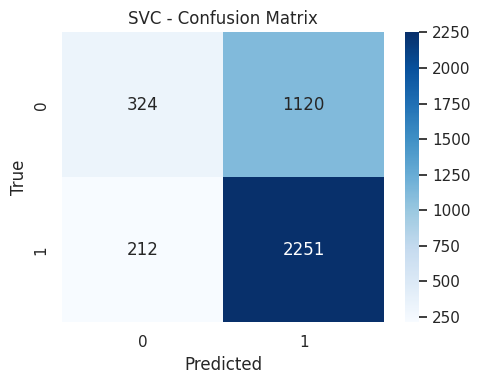


RandomForest:
 Acc: 0.6609  F1: 0.7596  Time/sample: 0.000040s
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.34      0.42      1444
           1       0.69      0.85      0.76      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.59      0.59      3907
weighted avg       0.64      0.66      0.64      3907



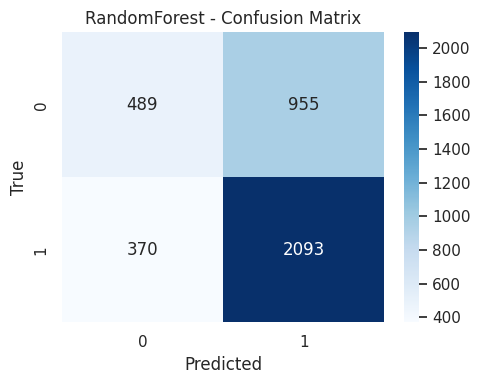


KNN:
 Acc: 0.6332  F1: 0.7278  Time/sample: 0.000129s
Classification report:
               precision    recall  f1-score   support

           0       0.50      0.39      0.44      1444
           1       0.68      0.78      0.73      2463

    accuracy                           0.63      3907
   macro avg       0.59      0.58      0.58      3907
weighted avg       0.62      0.63      0.62      3907



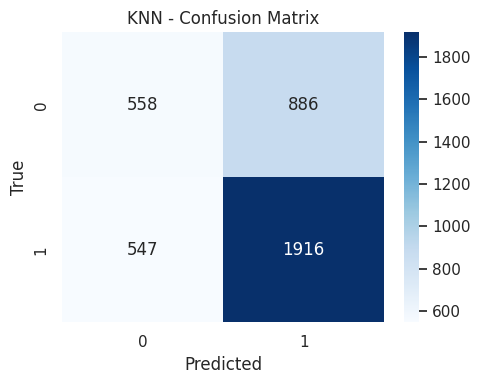


LogisticRegression:
 Acc: 0.6611  F1: 0.7663  Time/sample: 0.000002s
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.29      0.38      1444
           1       0.68      0.88      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.58      0.57      3907
weighted avg       0.64      0.66      0.62      3907



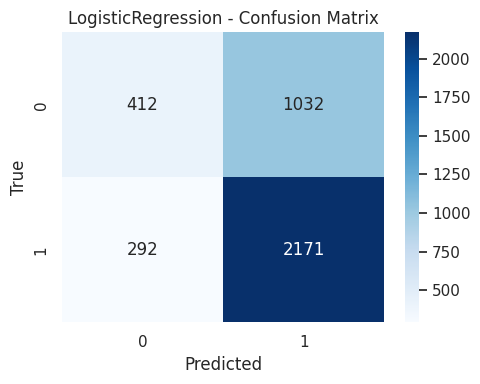


DecisionTree:
 Acc: 0.6598  F1: 0.7564  Time/sample: 0.000002s
Classification report:
               precision    recall  f1-score   support

           0       0.56      0.36      0.44      1444
           1       0.69      0.84      0.76      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.64      0.66      0.64      3907



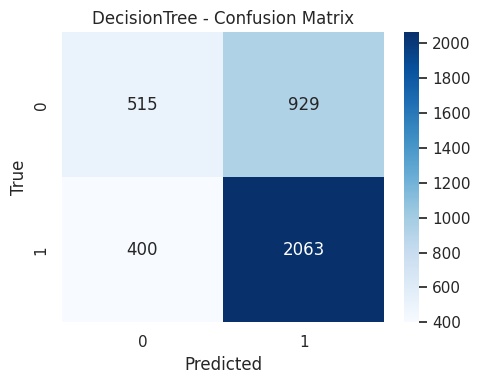

In [ ]:
def eval_on_test(model, X_te, y_te, label_names=None):
    t0 = time.perf_counter()
    y_pred = model.predict(X_te) # Make predictions on the test set
    t1 = time.perf_counter()
    total = t1 - t0
    per_sample = total / max(1, X_te.shape[0])

    is_binary = len(np.unique(y_te)) == 2
    avg = 'binary' if is_binary else 'macro'

    if label_names is not None:
        label_names = [str(x) for x in label_names]

    acc = accuracy_score(y_te, y_pred) # Calculate accuracy
    prec = precision_score(y_te, y_pred, average=avg, zero_division=0) # Calculate precision
    rec = recall_score(y_te, y_pred, average=avg, zero_division=0) # Calculate recall
    f1 = f1_score(y_te, y_pred, average=avg, zero_division=0) # Calculate F1-score
    cr = classification_report(y_te, y_pred, target_names=label_names, zero_division=0) # Generate classification report
    cm = confusion_matrix(y_te, y_pred) # Generate confusion matrix

    return {
        "y_pred": y_pred,
        "acc": acc,
        "prec": prec,
        "rec": rec,
        "f1": f1,
        "time_per_sample": per_sample,
        "cr": cr,
        "cm": cm
    }

baseline_results = {}
print("\n=== Baseline evaluation on test set ===")

for name, model in best_estimators.items():
    print(f"\n{name}:")
    res = eval_on_test(model, X_test, y_test, label_names=[str(c) for c in label_classes]) # Evaluate each best estimator on the test set
    baseline_results[name] = res
    print(f" Acc: {res['acc']:.4f}  F1: {res['f1']:.4f}  Time/sample: {res['time_per_sample']:.6f}s")
    print("Classification report:\n", res["cr"])


    plt.figure(figsize=(5,4))
    sns.heatmap(res["cm"], annot=True, fmt="d", cmap="Blues",
                xticklabels=[str(c) for c in label_classes],
                yticklabels=[str(c) for c in label_classes])
    plt.title(f"{name} - Confusion Matrix") # Plot confusion matrix
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

In [ ]:
print("\n=== Building ensembles (Bagging + Voting) ===")
bagging_kwargs = {"n_estimators": 30, "max_samples": 0.8, "random_state": RANDOM_STATE, "n_jobs": N_JOBS} # Parameters for BaggingClassifier

bagged_models = {}
if "SVC" in best_estimators:
    print("Building Bagging over tuned SVC (estimator cloned from best SVC).")
    tuned_svc = best_estimators["SVC"]
    bagged_svc = BaggingClassifier(estimator=clone(tuned_svc), **bagging_kwargs) # Create BaggingClassifier with best SVC
    bagged_svc.fit(X_train, y_train) # Train Bagging SVC
    bagged_models["Bagging SVC"] = bagged_svc
    joblib.dump(bagged_svc, os.path.join(SAVE_DIR, "bagged_svc.joblib")) # Save Bagging SVC model
    print("Saved bagged_svc.joblib")

if "DecisionTree" in best_estimators:
    print("Building Bagging over tuned DecisionTree.")
    tuned_dt = best_estimators["DecisionTree"]
    bagged_dt = BaggingClassifier(estimator=clone(tuned_dt), **bagging_kwargs) # Create BaggingClassifier with best Decision Tree
    bagged_dt.fit(X_train, y_train) # Train Bagging Decision Tree
    bagged_models["Bagging DT"] = bagged_dt
    joblib.dump(bagged_dt, os.path.join(SAVE_DIR, "bagged_dt.joblib")) # Save Bagging Decision Tree model
    print("Saved bagged_dt.joblib")

voting_members = []
if bagged_models:
    for k, m in bagged_models.items():
        voting_members.append((k, clone(m)))
else:
    for k, m in best_estimators.items():
        voting_members.append((k, clone(m))) # Prepare estimators for VotingClassifier

voting = VotingClassifier(estimators=voting_members, voting="soft", n_jobs=N_JOBS) # Create VotingClassifier with soft voting
voting.fit(X_train, y_train) # Train the VotingClassifier
joblib.dump(voting, os.path.join(SAVE_DIR, "voting_soft.joblib")) # Save the VotingClassifier model
print("Saved voting_soft.joblib")


=== Building ensembles (Bagging + Voting) ===
Building Bagging over tuned SVC (estimator cloned from best SVC).
Saved bagged_svc.joblib
Building Bagging over tuned DecisionTree.
Saved bagged_dt.joblib
Saved voting_soft.joblib



=== Ensemble evaluation on test set ===

Bagging SVC - Acc: 0.6598  F1: 0.7680  Time/sample: 0.011934s
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.26      0.36      1444
           1       0.67      0.89      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.63      0.58      0.57      3907
weighted avg       0.64      0.66      0.62      3907



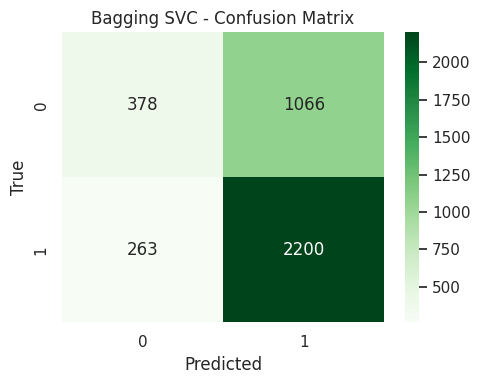


Bagging DT - Acc: 0.6655  F1: 0.7626  Time/sample: 0.000009s
Classification report:
               precision    recall  f1-score   support

           0       0.58      0.35      0.43      1444
           1       0.69      0.85      0.76      2463

    accuracy                           0.67      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.65      0.67      0.64      3907



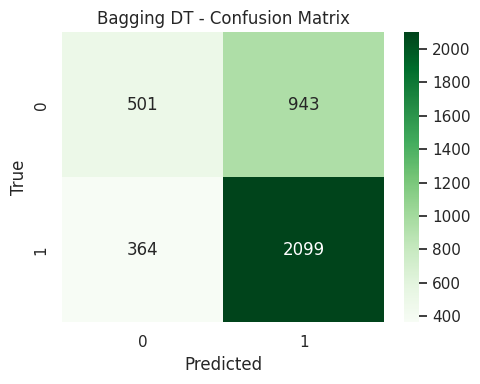


Voting (soft) - Acc: 0.6647  F1: 0.7686  Time/sample: 0.010465s
Classification report:
               precision    recall  f1-score   support

           0       0.59      0.29      0.39      1444
           1       0.68      0.88      0.77      2463

    accuracy                           0.66      3907
   macro avg       0.64      0.59      0.58      3907
weighted avg       0.65      0.66      0.63      3907



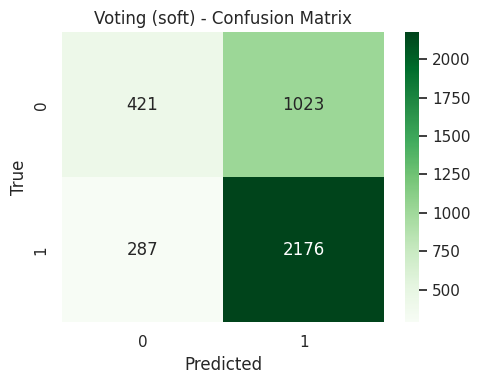

In [ ]:
ensemble_results = {}
all_ensemble_models = {**bagged_models, "Voting (soft)": voting}
print("\n=== Ensemble evaluation on test set ===")
for name, model in all_ensemble_models.items():
    res = eval_on_test(model, X_test, y_test, label_names=label_classes) # Evaluate ensemble models on the test set
    ensemble_results[name] = res
    print(f"\n{name} - Acc: {res['acc']:.4f}  F1: {res['f1']:.4f}  Time/sample: {res['time_per_sample']:.6f}s")
    print("Classification report:\n", res["cr"])
    plt.figure(figsize=(5,4))
    sns.heatmap(res["cm"], annot=True, fmt="d", cmap="Greens", xticklabels=label_classes, yticklabels=label_classes) # Plot confusion matrix
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

In [ ]:
rows = []
for name, res in baseline_results.items():
    rows.append({"model": name, "type": "baseline", "accuracy": res["acc"], "f1": res["f1"], "time_per_sample_s": res["time_per_sample"]})
for name, res in ensemble_results.items():
    rows.append({"model": name, "type": "ensemble", "accuracy": res["acc"], "f1": res["f1"], "time_per_sample_s": res["time_per_sample"]})

comp_df = pd.DataFrame(rows).sort_values("accuracy", ascending=False).set_index("model") # Create a DataFrame for model comparison
display(comp_df)
comp_df.to_csv(os.path.join(SAVE_DIR, "model_comparison_from_project.csv")) # Save the comparison DataFrame to a CSV file
print("Saved comparison CSV to:", os.path.join(SAVE_DIR, "model_comparison_from_project.csv"))

,type,accuracy,f1,time_per_sample_s
model,,,,
Bagging DT,ensemble,0.665472,0.762579,0.000009
Voting (soft),ensemble,0.664704,0.768633,0.010465
LogisticRegression,baseline,0.661121,0.766325,0.000002
RandomForest,baseline,0.660865,0.759572,0.000040
Bagging SVC,ensemble,0.659841,0.768022,0.011934
DecisionTree,baseline,0.659841,0.756370,0.000002
SVC,baseline,0.659073,0.771683,0.002607
KNN,baseline,0.633222,0.727825,0.000129


Saved comparison CSV to: /content/drive/MyDrive/Colab Notebooks/model_comparison_from_project.csv


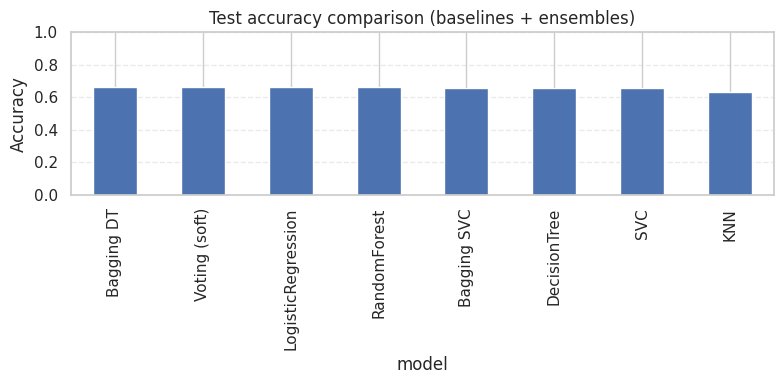

In [ ]:
plt.figure(figsize=(8,4))
comp_df['accuracy'].plot(kind='bar', ylim=(0,1)) # Plot a bar chart of test accuracies
plt.title("Test accuracy comparison (baselines + ensembles)") # Set plot title
plt.ylabel("Accuracy") # Set y-axis label
plt.grid(axis='y', linestyle='--', alpha=0.4) # Add grid lines
plt.tight_layout()
plt.show()

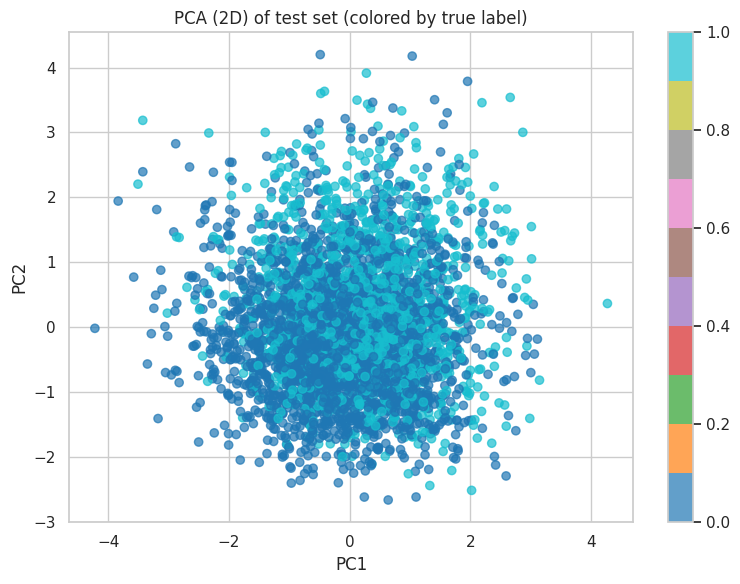


Finished. Model artifacts saved to: /content/drive/MyDrive/Colab Notebooks


In [ ]:
try:
    X_for_pca = X_test.copy()
    if isinstance(X_for_pca, pd.DataFrame):
        pca = PCA(n_components=2, random_state=RANDOM_STATE) # Initialize PCA to reduce to 2 components
        X_pca = pca.fit_transform(X_for_pca) # Fit PCA and transform the data
        plt.figure(figsize=(8,6))
        scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=pd.factorize(y_test)[0], cmap='tab10', alpha=0.7) # Create a scatter plot of the 2 PCA components
        plt.title("PCA (2D) of test set (colored by true label)") # Set plot title
        plt.xlabel("PC1"); plt.ylabel("PC2") # Set axis labels
        plt.colorbar() # Add a color bar
        plt.tight_layout()
        plt.show() # Display the plot
    else:
        print("X_test is not a DataFrame; skipping PCA visualization.")
except Exception as e:
    print("PCA visualization failed:", e)

print("\nFinished. Model artifacts saved to:", SAVE_DIR)